In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from src.plot_utils import *
from tqdm import tqdm


### Data Preparation

Soccer match event dataset is manually downloaded from Figshare (https://figshare.com/collections/Soccer_match_event_dataset/4415000/5) <br>
Original file formats are mainly json. Through some data processing, we converted them into 'pkl' format. <br>
These pkl files are provided separately. 

For this project, we will analyze one of interesting matches in FIFA WorldCup 2018 (Korea VS Germany), which did not let Germany advance beyond the first round. <br>
Match ID for this is 2057988

### Getting the data which we are interesting
#### As we learned in the Sports Data Analytics class, sports always have emotional consequences because there is always a division between winners and losers. The match between South Korea and Germany during the 2018 World Cup in Russia was a huge emotional match for us. In the match against Germany, the favorite to win, many media outlets and people expected Korea to lose. And almost 90 minutes into the second half, neither team scored a goal. However, after 90 minutes of the second half, the Korean team miraculously scored two goals to win 2-0. We would like to analyze this game, which brought joy to the Korean people with a miraculous victory.


##### Getting information on South Korea vs Germany matches in the 2018 FIFA World Cup Russia.
##### First of all, we bring up all the data from the 2018 FIFA World Cup Russia.

In [2]:
dataset_name = 'World_Cup'
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')
match_df

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
match_id,,,,,,,,,,
2057954,1,2018-06-14 15:00:00,Olimpiyskiy stadion Luzhniki,14358,Russia,5,16521,Saudi Arabia,0,Regular
2057955,1,2018-06-15 12:00:00,Stadion Central'nyj,16129,Egypt,0,15670,Uruguay,1,Regular
2057961,1,2018-06-15 15:00:00,Stadion Krestovskyi,16216,Morocco,0,10840,Iran,1,Regular
2057960,1,2018-06-15 18:00:00,Olimpiyskiy Stadion Fisht,9905,Portugal,3,1598,Spain,3,Regular
2057966,1,2018-06-16 10:00:00,Kazan' Arena,4418,France,2,8493,Australia,1,Regular
...,...,...,...,...,...,...,...,...,...,...
2058012,0,2018-07-07 18:00:00,Olimpiyskiy Stadion Fisht,14358,Russia,2,9598,Croatia,2,Penalties
2058014,0,2018-07-10 18:00:00,Stadion Krestovskyi,4418,France,1,5629,Belgium,0,Regular
2058015,0,2018-07-11 18:00:00,Olimpiyskiy stadion Luzhniki,9598,Croatia,2,2413,England,1,ExtraTime


##### Filtering competition informaiton
##### It filtered the games that Korea played in the World Cup.


In [3]:
match_df[(match_df['team1_name'] == 'Korea Republic') | (match_df['team2_name'] == 'Korea Republic')]

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
match_id,,,,,,,,,,
2057985,1,2018-06-18 12:00:00,Stadion Nizhny Novgorod,7047,Sweden,1,14855,Korea Republic,0,Regular
2057987,2,2018-06-23 15:00:00,Rostov Arena,14855,Korea Republic,1,15473,Mexico,2,Regular
2057988,3,2018-06-27 14:00:00,Kazan' Arena,14855,Korea Republic,2,3148,Germany,0,Regular


##### Getting competition event data

Bringing up Korea vs Germany event data in DataFrame form

In [4]:
match_id = 2057988
match_events = pd.read_pickle(f'data/refined_events/{dataset_name}/{match_id}.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12
1660,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68
1661,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72
1662,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00


### Identify data configurations utilizing deduplication

##### Series Element deduplication

First and second half classification

In [5]:
match_events['period'].unique()

array(['1H', '2H'], dtype=object)

Team Classification

In [6]:
match_events['team_name'].unique()

array(['Germany', 'Korea Republic'], dtype=object)

##### It is necessary to extract a list of players to find out the composition of each team's players


List of competitors

In [7]:
match_events['player_name'].unique()

array(['M. Özil', 'T. Kroos', 'N. Süle', 'M. Neuer', 'S. Khedira',
       'M. Hummels', 'Seon-Min Moon', 'Ja-Cheol Koo', 'Young-Gwon Kim',
       'J. Hector', 'Jae-Sung Lee', 'Yong Lee', 'Son Heung-Min',
       'Woo-Young Jung', 'Young-Sun Yun', 'Chul Hong', 'J. Kimmich',
       'M. Reus', 'T. Werner', 'Hyun-Woo Cho', 'Hyun-Soo Jang',
       'L. Goretzka', 'Hwang Hee-Chan', 'M. Gómez', 'T. Müller',
       'Se-Jong Ju', 'J. Brandt', 'Yo-Han Go'], dtype=object)

##### DataFrame remove row deduplication

ID and name of team and player

In [8]:
match_events[['team_id', 'team_name', 'player_id', 'player_name']].drop_duplicates().sort_values('team_id')

,team_id,team_name,player_id,player_name
0,3148,Germany,3319,M. Özil
99,3148,Germany,173214,T. Werner
1361,3148,Germany,146583,J. Brandt
163,3148,Germany,134387,L. Goretzka
23,3148,Germany,18669,J. Hector
48,3148,Germany,224593,J. Kimmich
1086,3148,Germany,14732,T. Müller
1001,3148,Germany,14731,M. Gómez
9,3148,Germany,14795,M. Hummels
8,3148,Germany,3318,S. Khedira


Let's check what data each event consists of to analyze event data necessary for game analysis.

In [9]:
match_events[['event_type', 'sub_event_type']].drop_duplicates().sort_values(['event_type', 'sub_event_type'])

,event_type,sub_event_type
94,Duel,Air duel
16,Duel,Ground attacking duel
15,Duel,Ground defending duel
17,Duel,Ground loose ball duel
21,Foul,Foul
525,Foul,Hand foul
1135,Foul,Simulation
155,Foul,Violent Foul
244,Free kick,Corner
22,Free kick,Free kick


Add a row containing the details to know the details of each event.

In [10]:
match_events[match_events['event_type'] == 'Substitution']

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
977,2057988,0,2H,600.0,14855,Korea Republic,349687,Hwang Hee-Chan,Substitution,Player in,[15781],NaN,NaN,NaN,NaN
978,2057988,0,2H,600.0,14855,Korea Republic,15781,Ja-Cheol Koo,Substitution,Player out,[349687],NaN,NaN,NaN,NaN
1001,2057988,0,2H,720.0,3148,Germany,14731,M. Gómez,Substitution,Player in,[3318],NaN,NaN,NaN,NaN
1002,2057988,0,2H,720.0,3148,Germany,3318,S. Khedira,Substitution,Player out,[14731],NaN,NaN,NaN,NaN
1086,2057988,0,2H,1020.0,3148,Germany,14732,T. Müller,Substitution,Player in,[134387],NaN,NaN,NaN,NaN
1087,2057988,0,2H,1020.0,3148,Germany,134387,L. Goretzka,Substitution,Player out,[14732],NaN,NaN,NaN,NaN
1207,2057988,0,2H,1380.0,14855,Korea Republic,209567,Se-Jong Ju,Substitution,Player in,[51625],NaN,NaN,NaN,NaN
1208,2057988,0,2H,1380.0,14855,Korea Republic,51625,Seon-Min Moon,Substitution,Player out,[209567],NaN,NaN,NaN,NaN
1361,2057988,0,2H,1920.0,3148,Germany,146583,J. Brandt,Substitution,Player in,[18669],NaN,NaN,NaN,NaN
1362,2057988,0,2H,1920.0,3148,Germany,18669,J. Hector,Substitution,Player out,[146583],NaN,NaN,NaN,NaN


### Let's proceed with visualization to easily identify where events occurred.

##### Event Location Static Plotting

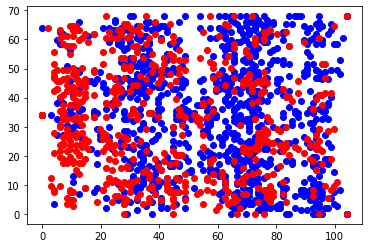

In [11]:
#Specify events for each team: Team1 events as blue, Team2 events as red
#All data are recorded as all teams are attacking from left to right
team1_name, team2_name = match_events['team_name'].unique()
team1_events = match_events[match_events['team_name'] == team1_name]
team2_events = match_events[match_events['team_name'] == team2_name]

plt.scatter(team1_events['start_x'], team1_events['start_y'], c='blue')
plt.scatter(team2_events['start_x'], team2_events['start_y'], c='red')
plt.show()

In order to express event data on the stadium, let's draw the stadium using the open code and insert the event data.

##### Stadium Image Visualization

(<Figure size 748.8x489.6 with 1 Axes>, <AxesSubplot:>)

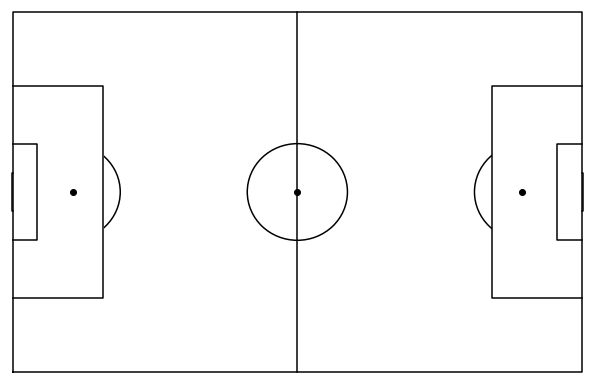

In [12]:
# We call the function called 'draw_pitch'
draw_pitch(pitch='white', line='black')

##### Visualize events on the stadium image w/ rotating attack direction of one team

In [13]:
#Rotate the attack direction only for one team
#X axis of stadium is 0 to 64 and Y axis of stadium is 0 to 104. Therefore to rotate the attack direction of one team, we run the following calculation

team2_events[['start_x', 'end_x']] = 104 - team2_events[['start_x', 'end_x']]
team2_events[['start_y', 'end_y']] = 68 - team2_events[['start_y', 'end_y']]

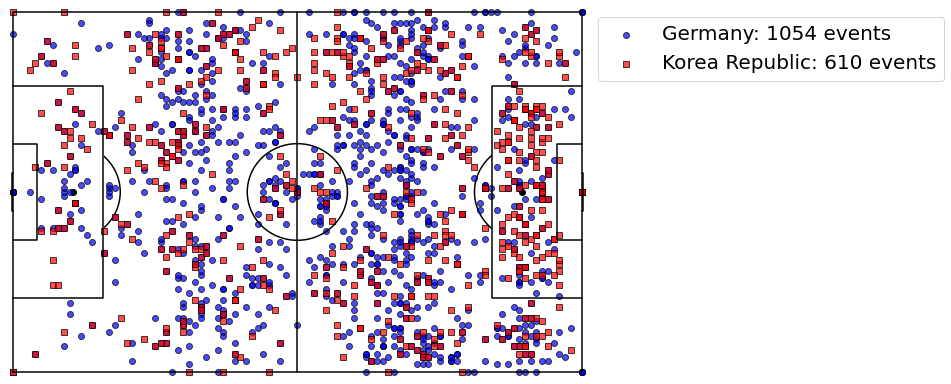

In [14]:
#draw stadium
draw_pitch('white', 'black')
#transparency 0.7 - because events can be overlapped
#border line black
#put label

plt.scatter(
    team1_events['start_x'], team1_events['start_y'], c='blue', edgecolors='k', alpha=0.7,
    label=f'{team1_name}: {len(team1_events)} events'
)
plt.scatter(
    team2_events['start_x'], team2_events['start_y'], marker='s', c='red', edgecolors='k', alpha=0.7,
    label=f'{team2_name}: {len(team2_events)} events'
)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

# plt.savefig('img/event_scatter.png', bbox_inches='tight')
plt.show()

As shown above, it can be seen that events in Germany occurred 1054 times and events in Korea occurred 610 times. From this, it can be seen that events in Germany occurred about twice as much events in Korea.

In order to analyze the pass among the event data, the path of the pass generated by each team was drawn on the stadium.

##### Pass path (start point - end point) visualization using plt.arrow

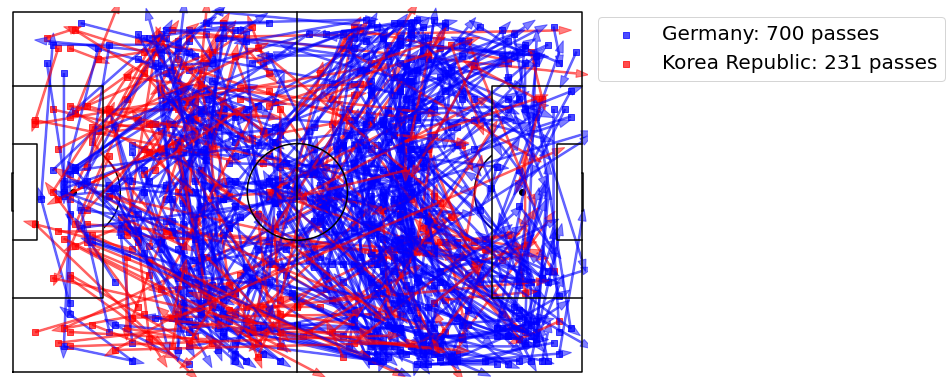

In [15]:
pass_records = match_events[
    (match_events['event_type'] == 'Pass') | #this includes Pass only from Open play
    (match_events['sub_event_type'].isin(['Free kick', 'Free kick cross', 'corner'])) #should be added to include all pass
]
team1_pass_records = pass_records[pass_records['team_name'] == team1_name] 
team2_pass_records = pass_records[pass_records['team_name'] == team2_name]

#draw stadium
draw_pitch('white', 'black')

#draw all passes as dot
plt.scatter(
    team1_pass_records['start_x'], team1_pass_records['start_y'], marker='s', c='blue', alpha=0.7,
    label=f'{team1_name}: {len(team1_pass_records)} passes'
)
plt.scatter(
    team2_pass_records['start_x'], team2_pass_records['start_y'], marker='s', c='red', alpha=0.7,
    label=f'{team2_name}: {len(team2_pass_records)} passes'
)

#draw arrows
for i, record in pass_records.iterrows():
    x = record['start_x']
    y = record['start_y']
    dx = record['end_x'] - x #end position - start position in x
    dy = record['end_y'] - y #end position - start position in y
    color = 'blue' if record['team_name'] == team1_name else 'red'
    plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, color=color, alpha=0.5) #x,y: start position of pass, dx,dy: length of arrow

plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

plt.savefig('img/pass_arrow.png', bbox_inches='tight')
plt.show()

Germany's passes occurred 700 times and Korea's passes occurred 231, and Germany's passes recorded about three times more than Korea's. can be seen in the visualization data aboveI can see that Germany's blue arrow is much more than Korea's red arrow.

### Event Location Interactive Plotting
We have visualized the function of interacting so that you can see the information by placing the mouse cursor on the event data point.

##### Event location interactive plotting using go.Scatter

In [16]:
#modify seconds to min & seonds
match_events['display_time'] = match_events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,display_time
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04,1H 00:01
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64,1H 00:02
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84,1H 00:04
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64,1H 00:08
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48,1H 00:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12,2H 53:33
1660,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68,2H 53:36
1661,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72,2H 53:38
1662,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00,2H 53:39


In [17]:
match_title = f'{team1_name} - {team2_name}'
label_func = lambda x: f"{x['event_type']} by {x['player_name']}, {x['display_time']}" #what should be shown on the label

team1_events = match_events[match_events['team_name'] == team1_name]
team1_trace = go.Scatter(
    x=team1_events['start_x'],
    y=team1_events['start_y'],
    name=team1_name,
    text=team1_events.apply(label_func, axis=1),
    mode='markers',
    marker=dict(size=8, color='blue')
)

team2_events = match_events[match_events['team_name'] == team2_name]
team2_events[['start_x', 'end_x']] = 104 - team2_events[['start_x', 'end_x']]
team2_events[['start_y', 'end_y']] = 68 - team2_events[['start_y', 'end_y']]
team2_trace = go.Scatter(
    x=team2_events['start_x'],
    y=team2_events['start_y'],
    name=team2_name,
    text=team2_events.apply(label_func, axis=1),
    mode='markers',
    marker=dict(size=8, color='red', symbol='square')
)

fig = go.Figure(data=[team1_trace, team2_trace], layout=get_pitch_layout(match_title))
fig.show()

This time, let's analyze each team's shooting event.

Visualize shooting location for both teams

In [18]:
#group_dict: dictionary of color setting
def plot_events(events, col_name, group_dict, event_type='all', rotate_team2_events=False):
    if event_type == 'all':
        match_title = f'{team1_name} - {team2_name}'
    else:
        events = events[events['event_type'] == event_type]
        match_title = f'{team1_name} - {team2_name} ({event_type})'

    if rotate_team2_events:
        events = events.copy()
        team2_idx = events['team_name'] == team2_name
        events.loc[team2_idx, ['start_x', 'end_x']] = 104 - events.loc[team2_idx, ['start_x', 'end_x']]
        events.loc[team2_idx, ['start_y', 'end_y']] = 68 - events.loc[team2_idx, ['start_y', 'end_y']]

    label_func = lambda x: f"{x['event_type']} by {x['player_name']}, {x['display_time']}"
    trace_list = []

    for group_name, color in group_dict.items():
        group_events = events[events[col_name] == group_name]
        trace = go.Scatter(
            x=group_events['start_x'],
            y=group_events['start_y'],
            text=group_events.apply(label_func, axis=1),
            mode='markers',
            marker=dict(size=8, color=color, symbol='square')
        )
        trace['name'] = group_name
        trace_list.append(trace)

    fig = go.Figure(data=trace_list, layout=get_pitch_layout(match_title))
    fig.show()

In [19]:
group_dict = {'Korea Republic': 'red', 'Germany': 'blue'}
plot_events(match_events, 'team_name', group_dict, event_type='Shot', rotate_team2_events=True)

As you can see above, the shooting event also shows that Germany shot far more than Korea.

Then, let's mark the passes and shooting points generated by Son Heung-min, one of Korea's main players.

##### Visualize only Son Heung-Min's Pass and Shot

In [20]:
#Only Son's Pass and Shot
pass_group_dict = {
    'Son Heung-Min': 'red'
}

shot_group_dict = {
    'Son Heung-Min': 'green'
}

plot_events(match_events, col_name='player_name', group_dict=pass_group_dict, event_type='Pass')
plot_events(match_events, col_name='player_name', group_dict=shot_group_dict, event_type='Shot')

As shown above, Son Heung-min's shooting points and pass points can be found to occur in both left and right sides because he is a player who uses both right and left feet.

#### Let's gain insight more easily by displaying Son Heung-min's events in the game with a heat map.

### Event Heat Map Visualization

In [21]:
#bring all matches during World Cup
match_events_list = []

for match_id in match_df.index:
    match_events = pd.read_pickle(f'data/refined_events/World_Cup/{2057988}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106491,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12
106492,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68
106493,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72
106494,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00


In [22]:
player_events = events[events['player_name'] == 'Son Heung-Min']
x = player_events['start_x']
y = player_events['start_y']
heatmap, xedges, yedges = np.histogram2d(y, x, bins=(3, 6), range=[[0, 68], [0, 104]])
heatmap, xedges, yedges

(array([[  0.,  64., 256., 192., 384., 448.],
        [ 64.,   0.,   0., 128., 832., 448.],
        [  0.,  64., 128., 384., 128., 192.]]),
 array([ 0.        , 22.66666667, 45.33333333, 68.        ]),
 array([  0.        ,  17.33333333,  34.66666667,  52.        ,
         69.33333333,  86.66666667, 104.        ]))

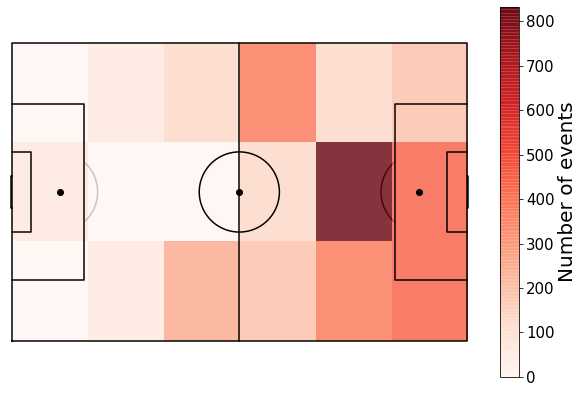

In [23]:
fig, ax = draw_pitch('white', 'black')

img = ax.imshow(heatmap[::-1], extent=[0, 104, 0, 68], vmin=0, cmap='Reds', alpha=0.8) #::-1 because heatmap y axis should be flipped to match to soccer stadium
cbar = fig.colorbar(img, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Number of events', size=20)

# plt.savefig('img/player_event_heatmap.png', bbox_inches='tight')

##### As above, it can be seen that Son Heung-min is generating events more actively on the right side of the stadium.

### Let's divide the game into 5 minute intervals to analyze which time zone had the most events and which time zone had the least events

### Aggregation and visualization of competition event data by time interval

##### Continuous data segmentation using pandas.cut function

Generate a list of reference points for 5 minute split aggregation

In [24]:
bins = np.arange(0, 50, 5)
bins = np.append(bins, [100])
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45, 100])

Segmentation of time intervals using reference points

In [25]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60, bins, right=False)
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04,"[0, 5)"
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64,"[0, 5)"
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84,"[0, 5)"
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64,"[0, 5)"
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48,"[0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12,"[45, 100)"
1660,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68,"[45, 100)"
1661,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72,"[45, 100)"
1662,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00,"[45, 100)"


##### Count events by time interval

Count events per team in 5 minutes

In [26]:
match_events.pivot_table('event_id', ['period', 'time_cat'], 'team_name', 'count')

team_name         Germany  Korea Republic
period time_cat                          
1H     [0, 5)          71              32
       [5, 10)         58              33
       [10, 15)        44              32
       [15, 20)        29              17
       [20, 25)        62              44
       [25, 30)        50              17
       [30, 35)        67              15
       [35, 40)        47              50
       [40, 45)        41              28
       [45, 100)       35              13
2H     [0, 5)          71              35
       [5, 10)         54              32
       [10, 15)        54              29
       [15, 20)        37              39
       [20, 25)        56              37
       [25, 30)        62              24
       [30, 35)        60              34
       [35, 40)        65              21
       [40, 45)        34              40
       [45, 100)       57              38

In [27]:
labels = []
for i in range(len(bins)-2):
    label = f'{bins[i]:02d}-{bins[i+1]:02d}'
    labels.append(label)
labels.append('45+')
labels

['00-05',
 '05-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '45+']

##### Visualize first half events in 5 minutes

Total number of events by first half time interval

In [28]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60, bins=bins, labels=labels, right=False)
count_by_time = match_events.pivot_table('event_id', ['period', 'time_cat'], 'team_name', 'count', fill_value=0)
count_by_time

team_name        Germany  Korea Republic
period time_cat                         
1H     00-05          71              32
       05-10          58              33
       10-15          44              32
       15-20          29              17
       20-25          62              44
       25-30          50              17
       30-35          67              15
       35-40          47              50
       40-45          41              28
       45+            35              13
2H     00-05          71              35
       05-10          54              32
       10-15          54              29
       15-20          37              39
       20-25          56              37
       25-30          62              24
       30-35          60              34
       35-40          65              21
       40-45          34              40
       45+            57              38

In [29]:
half_count_by_time = count_by_time.loc['1H', 'Korea Republic']
half_count_by_time

time_cat
00-05    32
05-10    33
10-15    32
15-20    17
20-25    44
25-30    17
30-35    15
35-40    50
40-45    28
45+      13
Name: Korea Republic, dtype: int64

Visualize bar graphs using the plt.bar function

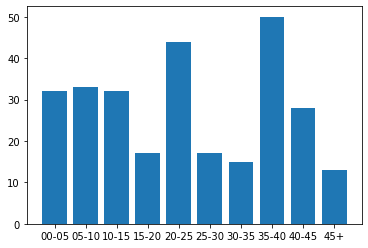

In [30]:
plt.bar(half_count_by_time.index, half_count_by_time.values)
plt.show()

##### Visualize the total number of events in the race in 5 minutes

Number of events per team in 5 minutes

In [31]:
count_by_time

team_name        Germany  Korea Republic
period time_cat                         
1H     00-05          71              32
       05-10          58              33
       10-15          44              32
       15-20          29              17
       20-25          62              44
       25-30          50              17
       30-35          67              15
       35-40          47              50
       40-45          41              28
       45+            35              13
2H     00-05          71              35
       05-10          54              32
       10-15          54              29
       15-20          37              39
       20-25          56              37
       25-30          62              24
       30-35          60              34
       35-40          65              21
       40-45          34              40
       45+            57              38

Convert multiple indexes to a single index

In [32]:
idx_1h = []
idx_2h = []

for multi_idx in count_by_time.index:
    if multi_idx[0] == '1H':
        idx = multi_idx[1]
        idx_1h.append(idx)
    else:
        if '-' in multi_idx[1]:
            edges = multi_idx[1].split('-')
            start_min = int(edges[0]) + 45
            end_min = int(edges[1]) + 45
            idx = f'{start_min:02d}-{end_min:02d}'
        else:
            idx = '90+'
        idx_2h.append(idx)

idx_1h, idx_2h

(['00-05',
  '05-10',
  '10-15',
  '15-20',
  '20-25',
  '25-30',
  '30-35',
  '35-40',
  '40-45',
  '45+'],
 ['45-50',
  '50-55',
  '55-60',
  '60-65',
  '65-70',
  '70-75',
  '75-80',
  '80-85',
  '85-90',
  '90+'])

Visualize horizontal bar graphs using the plt.barh function

In [33]:
count_by_time.index = idx_1h + idx_2h
count_by_time

team_name,Germany,Korea Republic
00-05,71,32
05-10,58,33
10-15,44,32
15-20,29,17
20-25,62,44
25-30,50,17
30-35,67,15
35-40,47,50
40-45,41,28
45+,35,13


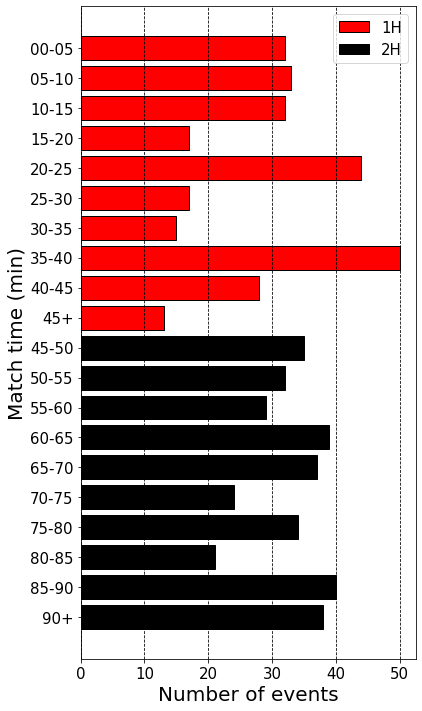

In [34]:
plt.figure(figsize=(6, 12))

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['red', 'black']):
    half_counts = count_by_time['Korea Republic'].loc[half_idx]
    plt.barh(half_idx, half_counts, label=half, color=color, edgecolor='black')

plt.gca().invert_yaxis()
plt.grid(axis='x', color='k', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of events', fontsize=20)
plt.ylabel('Match time (min)', fontsize=20)
plt.show()

##### Simultaneous visualization of number of occurrences by team using Subplot

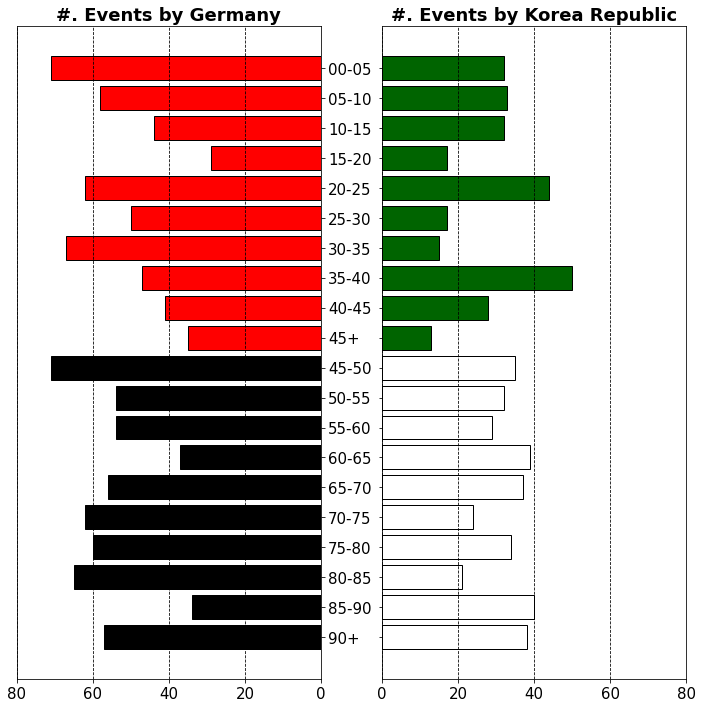

In [35]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))
team1_name, team2_name = match_events['team_name'].unique()

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['red', 'black']):
    half_counts = count_by_time[team1_name].loc[half_idx]
    axes[0].barh(half_idx, half_counts, color=color, edgecolor='k')

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['darkgreen', 'white']):
    half_counts = count_by_time[team2_name].loc[half_idx]
    axes[1].barh(half_idx, half_counts, color=color, edgecolor='k')

plt.gca().invert_yaxis()

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

for team_name, ax in zip([team1_name, team2_name], axes):
    ax.grid(axis='x', color='k', linestyle='--')
    ax.set_title(f'#. Events by {team_name}', size=18, fontweight='bold')
    ax.set_xticks(np.arange(0, 100, 20))
    ax.tick_params(labelsize=15)

plt.show()

### We visualized the sequence that led to the shooting or goal among the event data how each team attacked.

##### Extract Shot/Goal Sequence

In [36]:
goal_records = match_events[match_events['tags'].apply(lambda x: 'Goal' in x)]
goals = goal_records.groupby(['team_id', 'team_name', 'player_id', 'player_name', 'event_id'])['event_id'].count()
#goals.name = 'goals'
goal_records

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
1574,2057988,260664143,2H,2767.867,14855,Korea Republic,95200,Young-Gwon Kim,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",99.84,29.24,104.0,34.0,45+
1621,2057988,260664166,2H,3051.602,14855,Korea Republic,14911,Son Heung-Min,Shot,Shot,"[Goal, Counter attack, Left foot, Opportunity,...",98.80,41.48,104.0,34.0,45+


In [37]:
match_events['display_time'] = match_events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
) #sec to min & sec
cols = ['period', 'time', 'display_time', 'team_name', 'player_name'] + match_events.columns[8:-1].tolist()
match_events = match_events[match_events['event_type'] != 'Substitution'][cols] #player substitution is not relevant here

team1_name, team2_name = match_events['team_name'].unique()
team2_x = match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']]
team2_y = match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']]
match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']] = 104 - team2_x #attack direction change for Team2
match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']] = 68 - team2_y #attack direction change for Team2

Compare current event and previous event and extract paths where ball posession is kept by one team

In [38]:
#exclude Duel
events_except_duels = match_events[match_events['event_type'] != 'Duel'] 

#make list to collect attack sequences
seq_records = [] 

#whenever new attack sequence is appearing, this will be initialized... and save index information
event_idxs = [events_except_duels.index[0]] 

#compare current event and previous event. If some conditions are met, then current event and previous event are considered in the same attack sequence
for i in events_except_duels.index[1:]:
    prev_event = match_events.loc[event_idxs[-1]] 
    cur_event = match_events.loc[i]
    if (
        cur_event['period'] == prev_event['period'] and #event should be within same period e.g. 1H, 2H
        cur_event['event_type'] != 'Free kick' and #anything that was stopped and re-started should be excluded
        cur_event['time'] - prev_event['time'] < 15 and #time difference should be lower than 15 seconds (to exclude any short stops)
        cur_event['team_name'] == prev_event['team_name']
    ):
        event_idxs.append(i)
    else:
        seq_records.append({
            'team_name': match_events.at[event_idxs[0], 'team_name'],
            'first_idx': event_idxs[0],
            'last_idx': event_idxs[-1]
        })
        event_idxs = [i]

#change to Data Frame
seq_records = pd.DataFrame(seq_records) 
seq_records['len'] = seq_records['last_idx'] - seq_records['first_idx'] + 1
seq_records = seq_records[seq_records['len'] >= 2].reset_index(drop=True) #sequence should be equal or bigger than 2 events
seq_records

,team_name,first_idx,last_idx,len
0,Germany,0,14,15
1,Germany,23,27,5
2,Korea Republic,28,32,5
3,Korea Republic,36,41,6
4,Germany,44,51,8
...,...,...,...,...
212,Germany,1636,1639,4
213,Germany,1643,1647,5
214,Germany,1651,1652,2
215,Korea Republic,1655,1656,2


For each attrack sequence, adds event type and tags for last event index

In [39]:
#add additional coloums
seq_records['last_x'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_x'])
seq_records['last_y'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_y'])
seq_records['last_event_type'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'event_type'])
seq_records['last_event_tags'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'tags'])
seq_records

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
0,Germany,0,14,15,47.84,31.96,Pass,[Accurate]
1,Germany,23,27,5,0.00,63.92,Others on the ball,[Not accurate]
2,Korea Republic,28,32,5,5.20,48.96,Pass,[Accurate]
3,Korea Republic,36,41,6,71.76,4.76,Pass,[Not accurate]
4,Germany,44,51,8,31.20,51.00,Pass,[Accurate]
...,...,...,...,...,...,...,...,...
212,Germany,1636,1639,4,88.40,30.60,Shot,"[Right foot, Opportunity, Position: Goal cente..."
213,Germany,1643,1647,5,70.72,31.28,Pass,[Not accurate]
214,Germany,1651,1652,2,96.72,17.68,Pass,[Not accurate]
215,Korea Republic,1655,1656,2,104.00,34.00,Goalkeeper leaving line,[]


Filter Shot Sequence

In [40]:
seq_records[seq_records['last_event_type'] == 'Shot']

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
28,Germany,244,250,7,93.60,32.64,Shot,"[Head/body, Opportunity, Position: Goal high r..."
35,Korea Republic,292,296,5,30.16,43.52,Shot,"[Right foot, Position: Out high right, Not acc..."
67,Germany,510,522,13,82.16,33.32,Shot,"[Left foot, Blocked, Not accurate]"
84,Germany,638,642,5,94.64,22.44,Shot,"[Right foot, Blocked, Opportunity, Not accurate]"
85,Germany,644,652,9,98.80,40.12,Shot,"[Right foot, Opportunity, Position: Goal low c..."
97,Korea Republic,775,782,8,22.88,44.20,Shot,"[Right foot, Opportunity, Position: Out low le..."
102,Germany,812,830,19,95.68,32.64,Shot,"[Head/body, Opportunity, Position: Goal center..."
108,Germany,862,866,5,72.80,37.40,Shot,"[Right foot, Opportunity, Position: Out low le..."
111,Germany,891,903,13,92.56,35.36,Shot,"[Right foot, Opportunity, Position: Out center..."
115,Germany,932,946,15,90.48,24.48,Shot,"[Left foot, Blocked, Not accurate]"


Filter Score sequence

In [41]:
seq_records[seq_records['last_event_tags'].apply(lambda x: 'Goal' in x)]

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
210,Korea Republic,1620,1621,2,5.2,26.52,Shot,"[Goal, Counter attack, Left foot, Opportunity,..."


##### Visualize all Shot Sequence

In [42]:
def visualize_sequence(match_events, first_idx, last_idx, title=None, filename=None, rotate_team2_events=False):
    cols = [
        'period', 'time', 'display_time', 'team_name', 'player_name',
        'event_type', 'sub_event_type', 'tags', 'start_x', 'start_y', 'end_x', 'end_y'
    ]
    match_events = match_events[match_events['event_type'] != 'Substitution'][cols]

    team1_name, team2_name = match_events['team_name'].unique()

    seq_events = match_events.loc[first_idx:last_idx].copy()
    if rotate_team2_events:
        team2_idx = seq_events['team_name'] == team2_name
        seq_events.loc[team2_idx, ['start_x', 'end_x']] = 104 - seq_events.loc[team2_idx, ['start_x', 'end_x']]
        seq_events.loc[team2_idx, ['start_y', 'end_y']] = 68 - seq_events.loc[team2_idx, ['start_y', 'end_y']]

    duels = seq_events[seq_events['event_type'] == 'Duel']
    diffs = duels[['time', 'start_x', 'start_y']].diff().shift(-1).fillna(10).abs().sum(axis=1)
    seq_events_plotted = seq_events.drop(index=duels[diffs < 2].index)
    seq_events_plotted.loc[seq_events_plotted['event_type'] == 'Duel', 'team_name'] = 'Duel'

    draw_pitch('white', 'black')

    color_dict = {team1_name: 'red', team2_name: 'blue', 'Duel': 'black'}
    colors = seq_events_plotted['team_name'].apply(lambda x: color_dict[x])
    plt.scatter(seq_events_plotted['start_x'], seq_events_plotted['start_y'], c=colors, s=400)

    for i, event in seq_events_plotted.iterrows():
        x = event['start_x']
        y = event['start_y']
        plt.annotate(i % 100, xy=[x, y], color='white', ha='center', va='center', fontsize=15)
        if not np.isnan(event['end_x']):
            dx = event['end_x'] - x
            dy = event['end_y'] - y
            color = color_dict[event['team_name']]
            plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, length_includes_head=True, color=color, alpha=0.5)

    if title is None:
        title = seq_events['display_time'].iloc[-1]
    plt.title(title, fontdict={'size': 20})
    
    if filename is not None:
        plt.savefig(f'img/{filename}', bbox_inches='tight')

    plt.show()
    return seq_events[seq_events.columns[2:-4]]

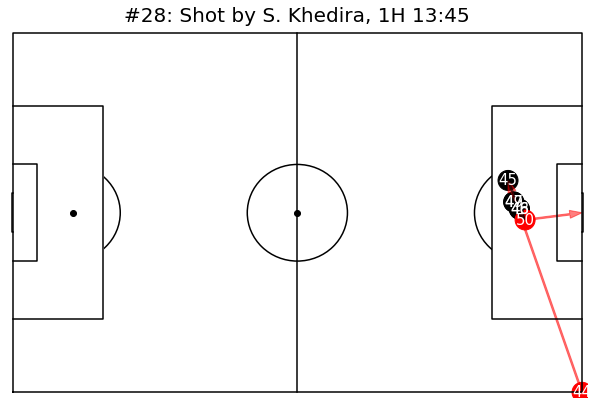

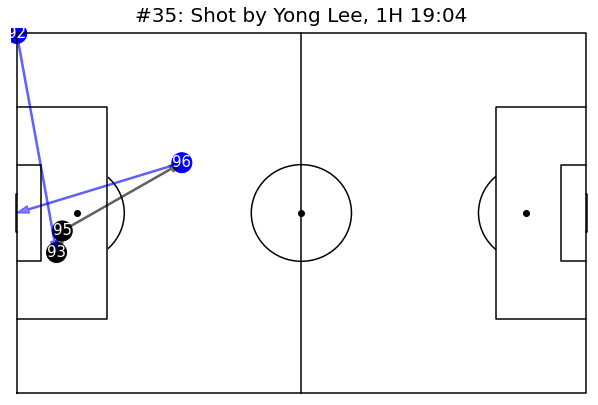

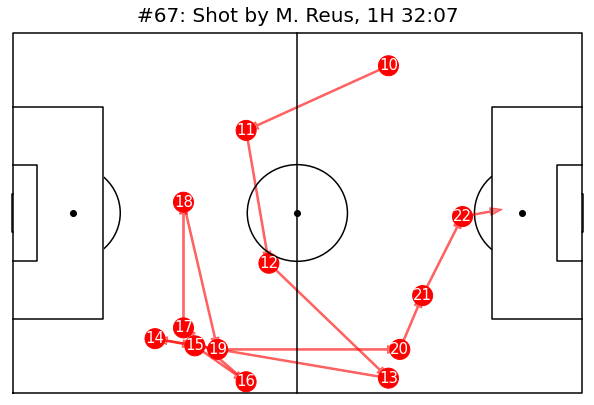

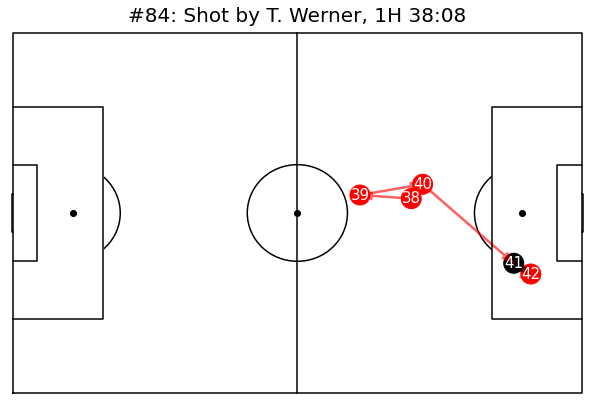

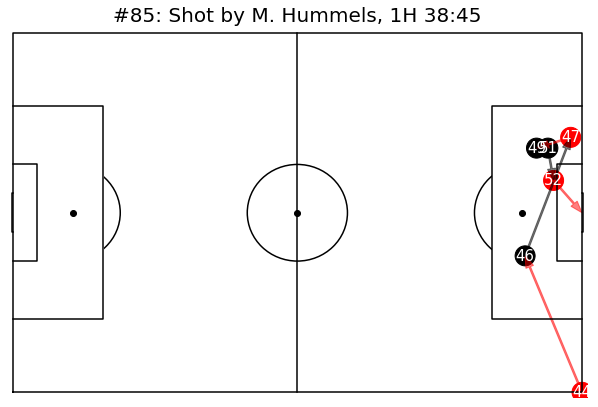

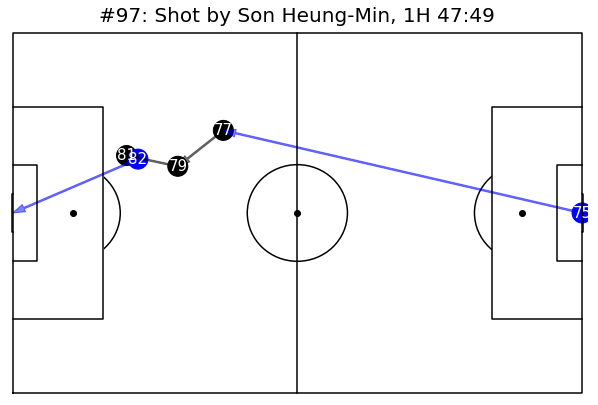

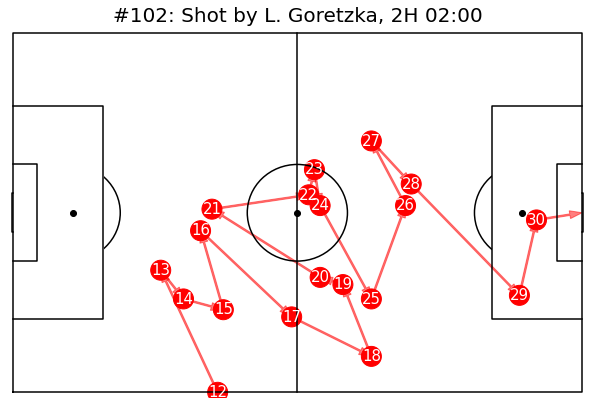

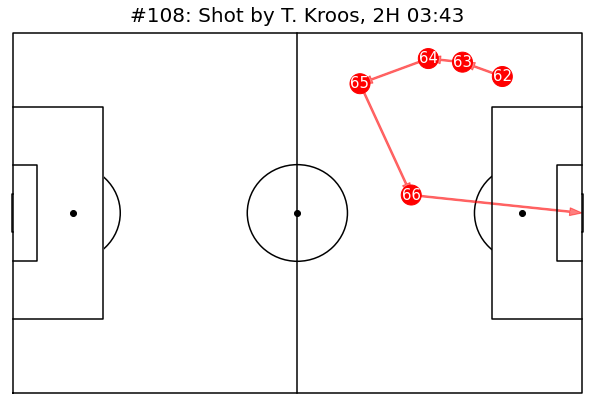

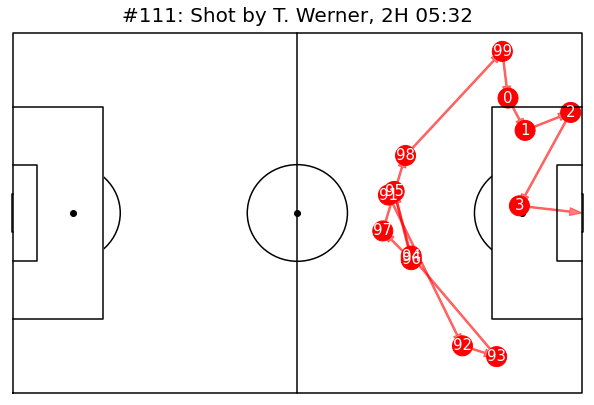

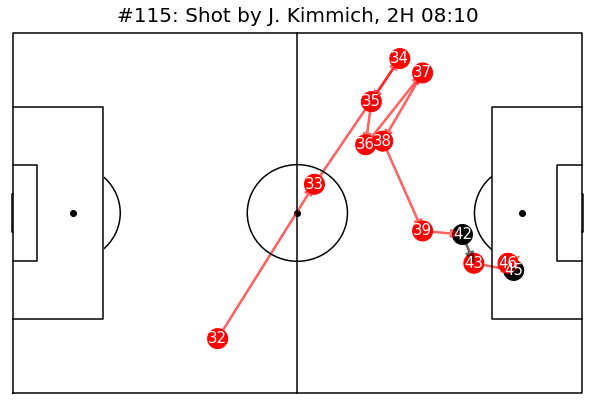

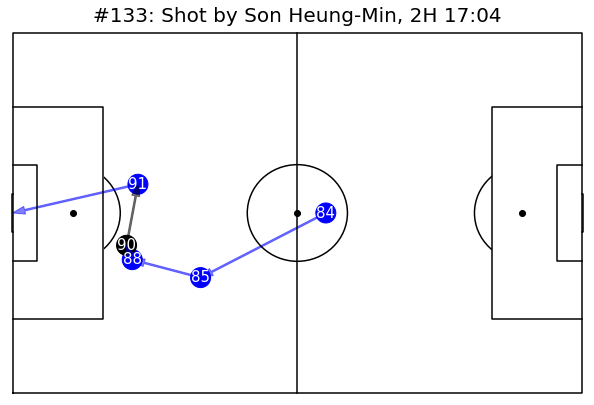

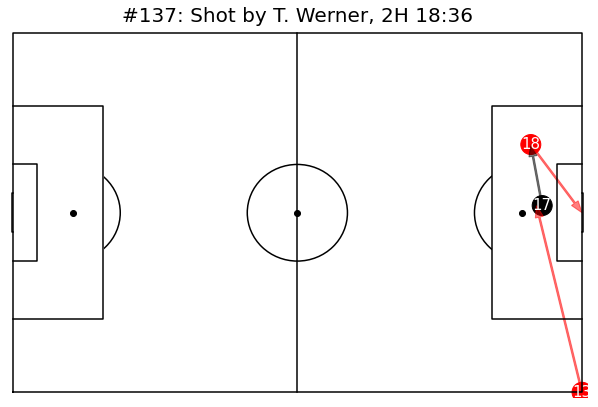

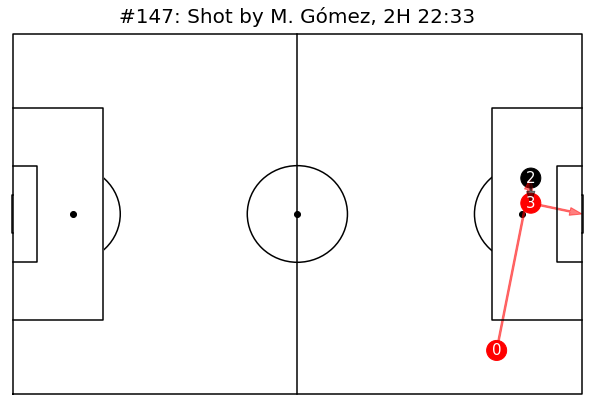

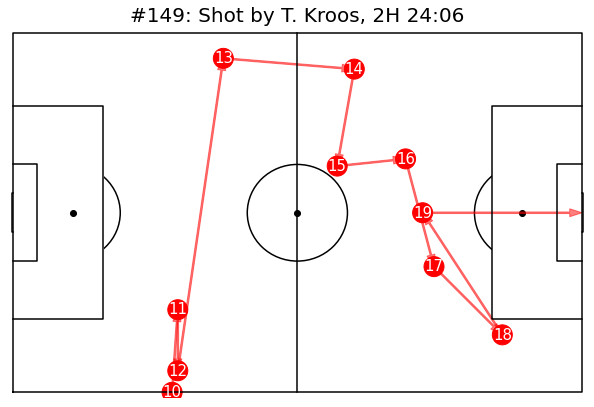

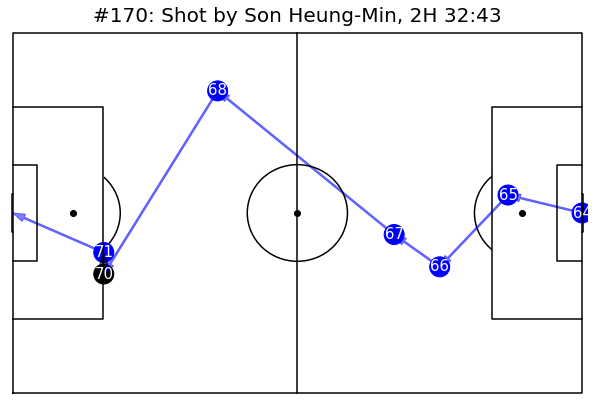

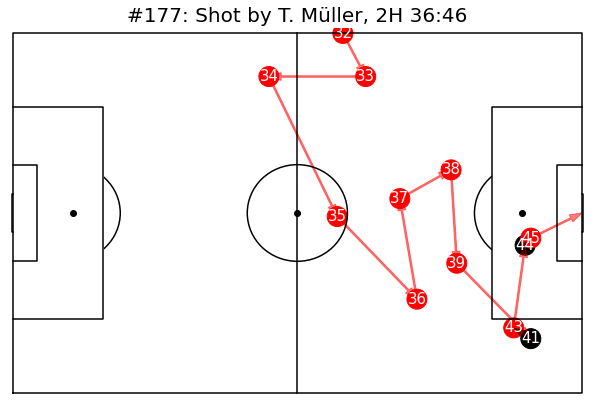

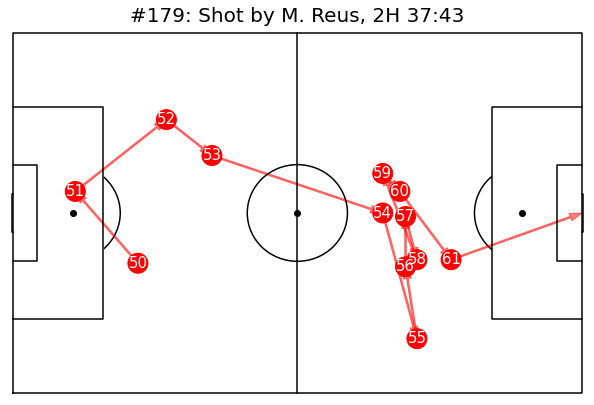

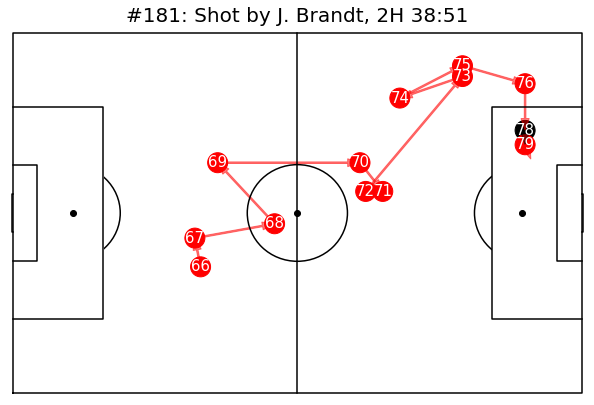

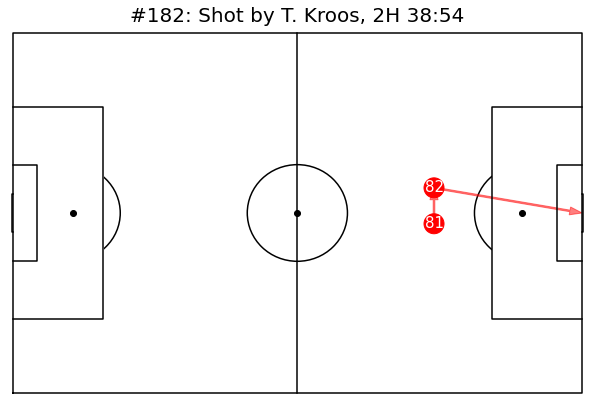

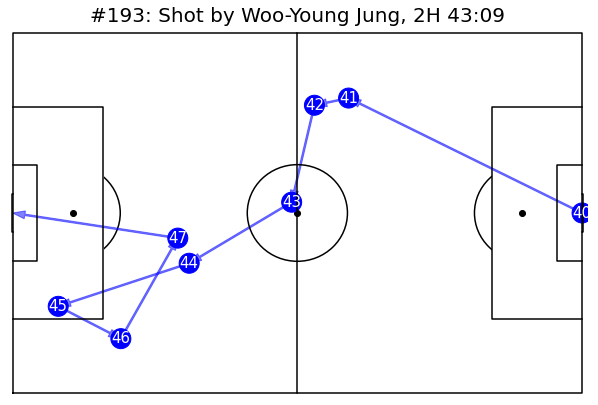

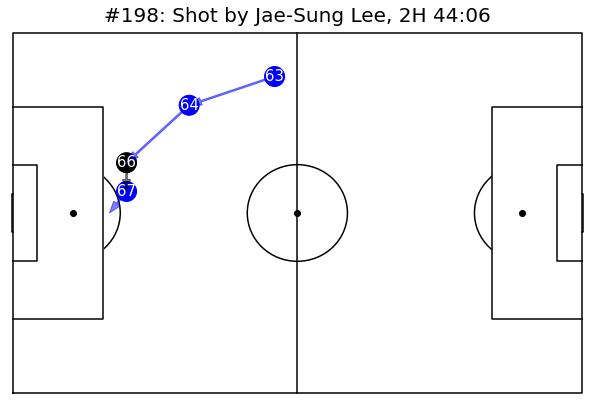

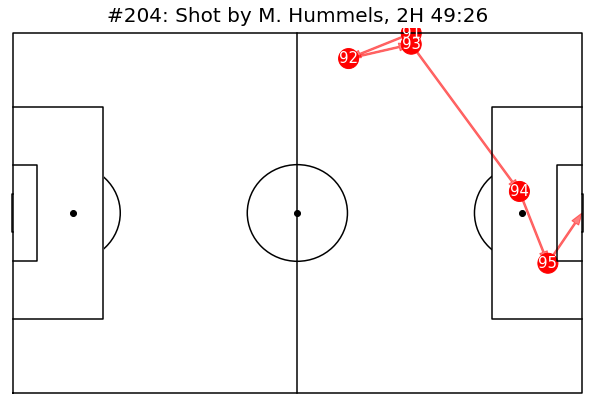

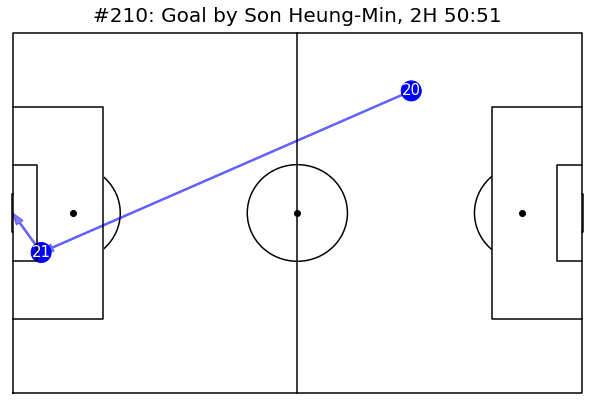

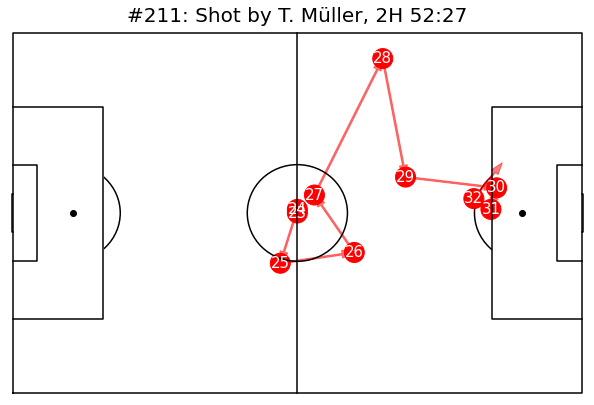

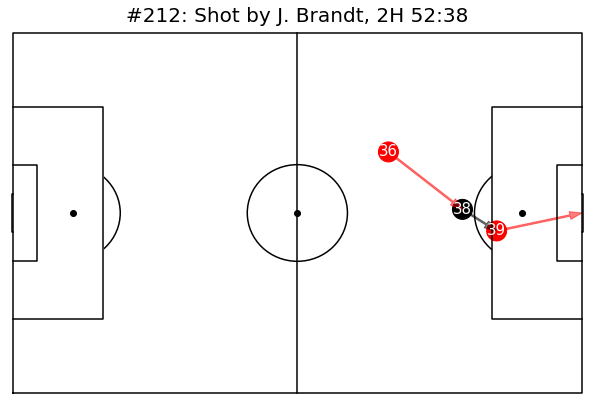

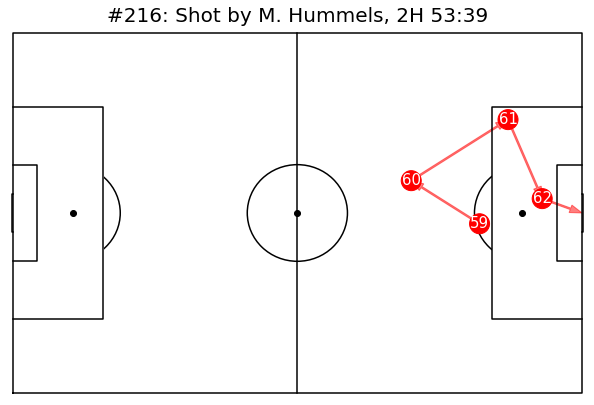

In [43]:
shot_seq_records = seq_records[seq_records['last_event_type'] == 'Shot']

for i in shot_seq_records.index:
    first_idx = seq_records.at[i, 'first_idx']
    last_idx = seq_records.at[i, 'last_idx']

    last_event_time = match_events.at[last_idx, 'display_time']
    last_event_type = match_events.at[last_idx, 'event_type']
    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    if 'Goal' in last_event_tags:
        title = f"#{i}: Goal by {last_event_player}, {last_event_time}"
    else:
        title = f"#{i}: {last_event_type} by {last_event_player}, {last_event_time}"

    visualize_sequence(match_events, first_idx, last_idx, title)

##### Sequence Length Distribution

Sequence Length Statistics

In [44]:
seq_len_counts = seq_records.pivot_table('first_idx', 'len', 'team_name', aggfunc='count', fill_value=0)
seq_len_counts

team_name,Germany,Korea Republic
len,,
2,25,29
3,9,7
4,15,16
5,12,10
6,12,8
7,7,1
8,11,6
9,6,1
10,8,2


Visualization using bar chart

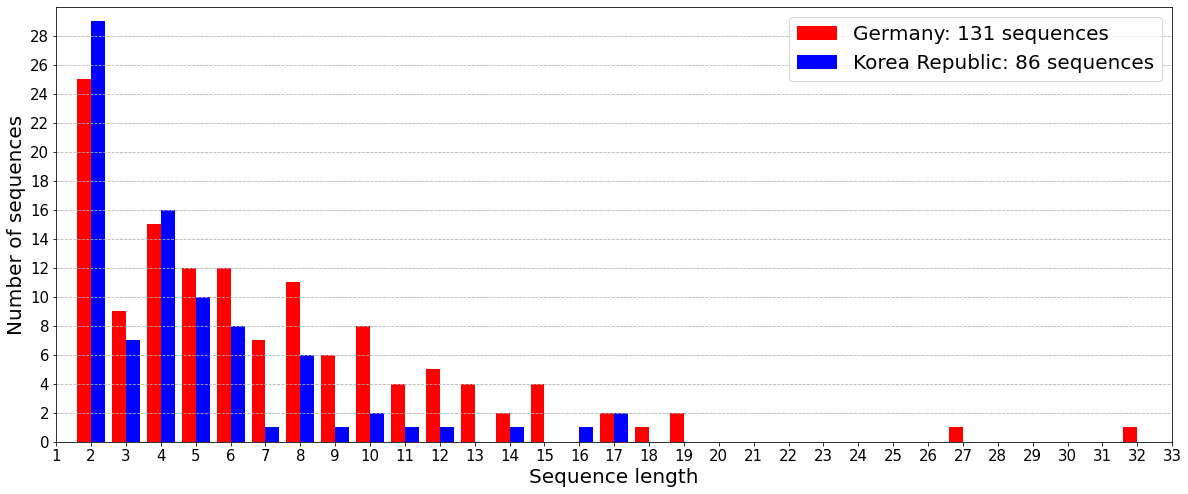

In [45]:
plt.figure(figsize=(20, 8))

team1_name, team2_name = seq_len_counts.columns
team1_label = f'{team1_name}: {seq_len_counts[team1_name].sum()} sequences'
team2_label = f'{team2_name}: {seq_len_counts[team2_name].sum()} sequences'
plt.bar(seq_len_counts.index - 0.2, seq_len_counts[team1_name], width=0.4, color='red', label=team1_label)
plt.bar(seq_len_counts.index + 0.2, seq_len_counts[team2_name], width=0.4, color='blue', label=team2_label)

max_len = seq_len_counts.index[-1] + 1
max_count = seq_len_counts.max().max() + 1
plt.xticks(np.arange(max_len) + 1, fontsize=15)
plt.yticks(np.arange(0, max_count, 2), fontsize=15)
plt.xlim(1, max_len)
plt.ylim(0, max_count)
plt.xlabel('Sequence length', fontdict={'size': 20})
plt.ylabel('Number of sequences', fontdict={'size': 20})

plt.grid(axis='y', linestyle='--')
plt.legend(fontsize=20)
plt.show()

As shown above, when the length of the sequence is less than 2, South Korea is overwhelming, but as the length of the sequence increases, the proportion of Germany increases significantly. As a result, it can be seen that Germany is playing soccer with a longer sequence than South Korea.

## Conclusion

### We analyzed the data for Sports Data Analytics's project, and above all, we were able to analyze the data with fun and not boring. The match is an unforgettable World Cup match for the Korean people, and it was very interesting to analyze the data of such a meaningful match. In addition, through these analyses, I was able to understand soccer more deeply based on data. This is the first time I have dealt with sports data while studying data science, and through this class, I have gained confidence in sports data analysis and I am confident that this experience will have a good impact on my future data science career. In the future, the sports data industry is expected to collect more data due to wearable sensor-based positioning technology. As a result, the demand for sports data analysis will increase further. I'm very satisfied because I think I took the opportunity to analyze the data through my favorite sports and prepare for the field.

### In addition, world-class clubs such as Barcelona, Liverpool, and Manchester City recruited mathematicians, murilologists, and computer scientists for data analysis, and world-class players such as Kevin De Briner renewed their contracts with astronomical amounts with the help of data analysts, not agents. In the future, sports data analysis is considered to be very promising. And this class was enough to serve as a stepping stone to the promising industry.

[Watch on YouTube about Republic of Korea vs German highlight](https://www.youtube.com/watch?v=OKjV2SQfKrw)